## Рубежный контроль №1
### Ефременко Даниил Сергеевич ИУ5-63Б Вариант 3

Тема: Технологии разведочного анализа и обработки данных.
Варианты заданий.

Номер варианта - 3
Номер задачи - 1
Номер набора данных, указанного в задаче - 3
Для студентов группы ИУ5-63Б - для произвольной колонки данных построить график "Ящик с усами (boxplot)".

Задача №1.
Для заданного набора данных проведите корреляционный анализ.

В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски.

Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

Выполнение:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('toy_dataset.csv')

In [3]:
df

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [4]:
df.shape

(150000, 6)

In [5]:
df.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

#### Количество уникальных значений:

In [6]:
df.nunique()

Number     150000
City            8
Gender          2
Age            41
Income      71761
Illness         2
dtype: int64

In [7]:
df.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

### Вывод: нулевых значений нет

## Визуализация данных:

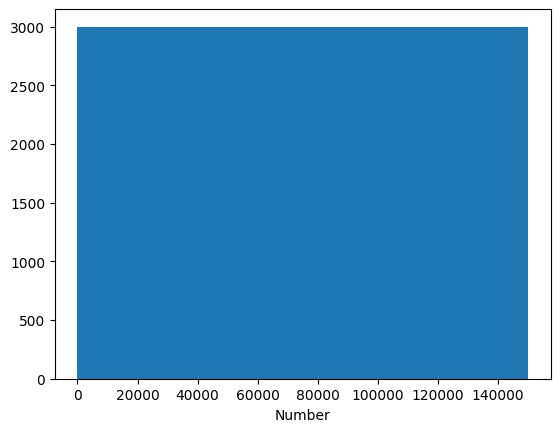

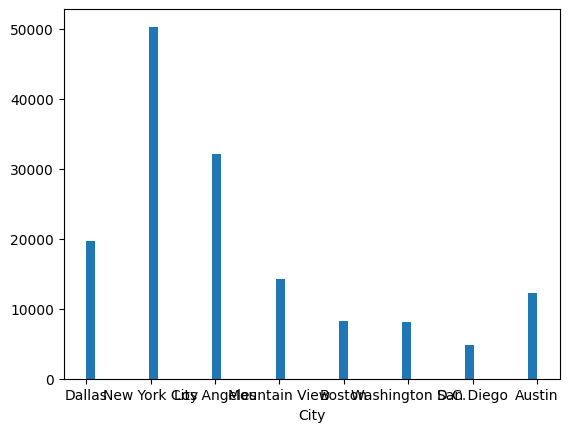

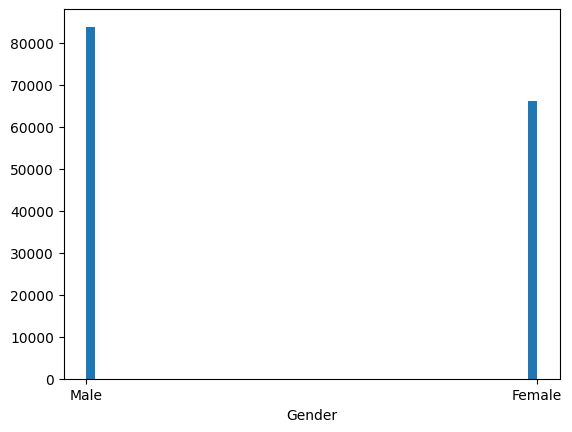

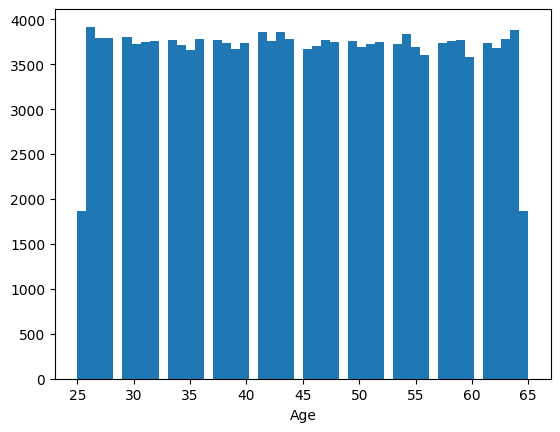

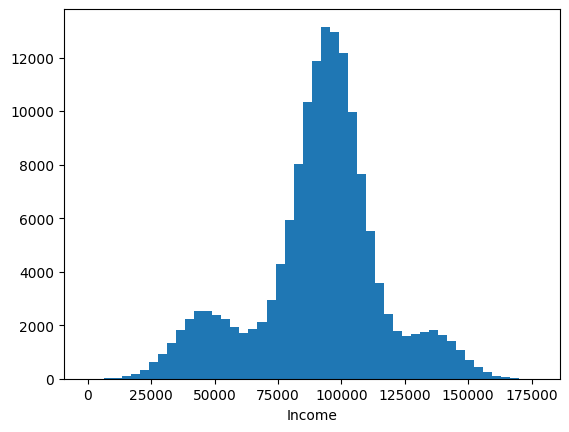

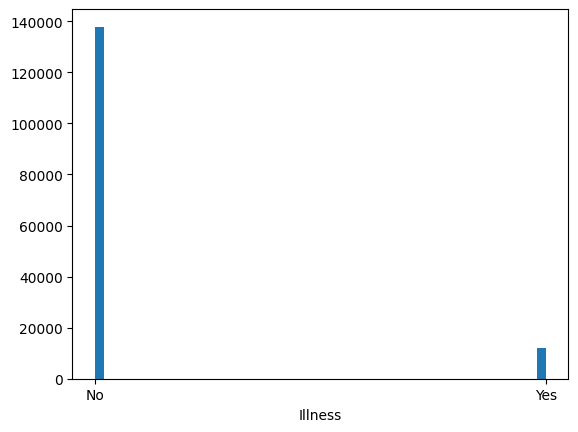

In [8]:
for col in df:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

## Корреляция:

Преобразуем строковые данные в числовые для построения дальнейшей корреляции.

In [9]:

df['Gender'].mask(df['Gender'] == 'Female', 0, inplace=True)
df['Gender'].mask(df['Gender'] == 'Male', 1, inplace=True)
df['Illness'].mask(df['Illness'] == 'Yes', 1, inplace=True)
df['Illness'].mask(df['Illness'] == 'No', 0, inplace=True)
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')
df['Illness'] = pd.to_numeric(df['Illness'], errors='coerce')
df = df.drop(columns='Number') 
df.dtypes
df.head()

,City,Gender,Age,Income,Illness
0,Dallas,1,41,40367.0,0
1,Dallas,1,54,45084.0,0
2,Dallas,1,42,52483.0,0
3,Dallas,1,40,40941.0,0
4,Dallas,1,46,50289.0,0


<Axes: >

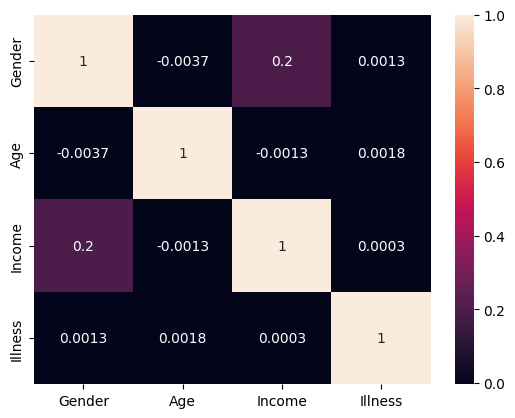

In [10]:
df = df.drop(columns='City')
sns.heatmap(df.corr(), annot = True)

Таким образом, наличие заболеваний не зависит напрямую от пола, 
дохода и возраста. Можно видеть, что лучше всего между собой коррелируют пол и доход. 
Однако, по данному датасету  сложно построить модель, так как он содержит мало зависимых данных. 


Дополнительное задание.
Построим график "Ящик с усами (boxplot)".

<Axes: xlabel='Age'>

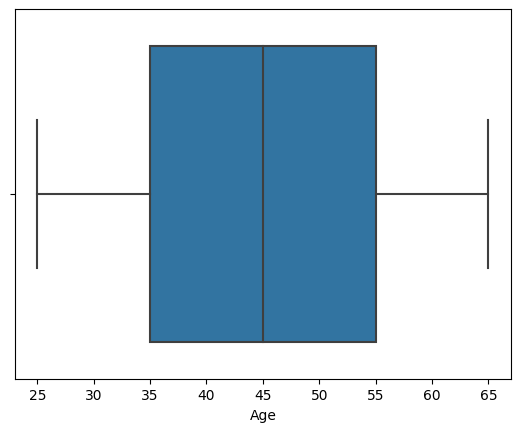

In [11]:
sns.boxplot( x=df["Age"])

<Axes: xlabel='Income'>

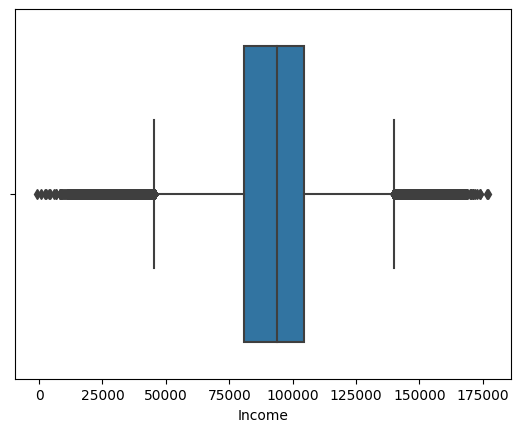

In [12]:
sns.boxplot( x=df["Income"])

<Axes: xlabel='Age', ylabel='Income'>

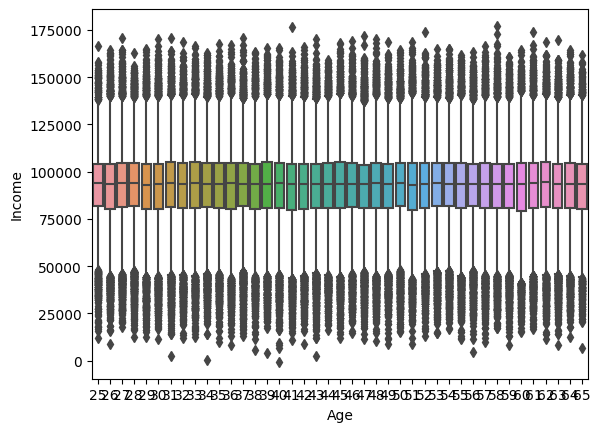

In [13]:
sns.boxplot( x=df["Age"], y=df["Income"])